# 6. Major Pick_Up Destinations for SafeCar Demand 30052023

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import WordListCorpusReader
import string
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Reading Dataset
try:
  csv_file = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/WB_SB/6. Major SC PickUp & DropOff Locations.xlsx')
  #print (df_data)
except Exception as e:
  print (e)

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
# Read the specific column from the file 
column_name = 'destination_address'

# Read the specific column from the CSV file into a Series and converted into a String data type
text_responses = csv_file[column_name].astype(str)

# Print the column data
print(text_responses)

0               Dr BT residence, Komamboga, Kampala, Uganda
1               Dr BT residence, Komamboga, Kampala, Uganda
2               Dr BT residence, Komamboga, Kampala, Uganda
3               Dr BT residence, Komamboga, Kampala, Uganda
4           SafeBoda Academy, Kanyike Road, Kampala, Uganda
                                ...                        
119235    Middle East Restaurant, 9J24+988 Marigold Heig...
119236                 Mirambos Playground, Kampala, Uganda
119237    Kyanja Ring Road, Kyanja Ring Rd, Kampala, Uganda
119238                    Lungujja Kitunzi, Kampala, Uganda
119239    Modern Living Ltd, Bukasa Close, Off Tank Hill...
Name: destination_address, Length: 119240, dtype: object


In [ ]:
# Join the survey responses into a single string
text = ' '.join(text_responses)

In [ ]:
# Text Data Cleaning

# Lowercasing
text = text.lower()

# Tokenization
tokens = word_tokenize(text)

# Removing Punctuation
translator = str.maketrans('', '', string.punctuation)
tokens = [token.translate(translator) for token in tokens]

# Stop Word Removal
stop_words = set(stopwords.words('english'))

# Define additional texts to remove
additional_texts = ['kampala', 'uganda', 'region','pobox', 'po box', 'po', 'box', 'acacia mall']

# Filter out the Stop Words and Additional Texts
filtered_tokens = [token for token in tokens if token.lower() not in stop_words and token.lower() not in additional_texts]

# Filter out the Stop Words and Additional Texts
#filtered_tokens = [token for token in tokens if token.lower() not in stopwords and token.lower() not in [text.lower() for text in additional_texts]]

# Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

# Join the cleaned tokens into a single string
cleaned_text = ' '.join(lemmatized_tokens)

# Print the cleaned text
print(cleaned_text)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



**Major Destinations for SafeCar Demand**

In [ ]:
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cleaned_text)

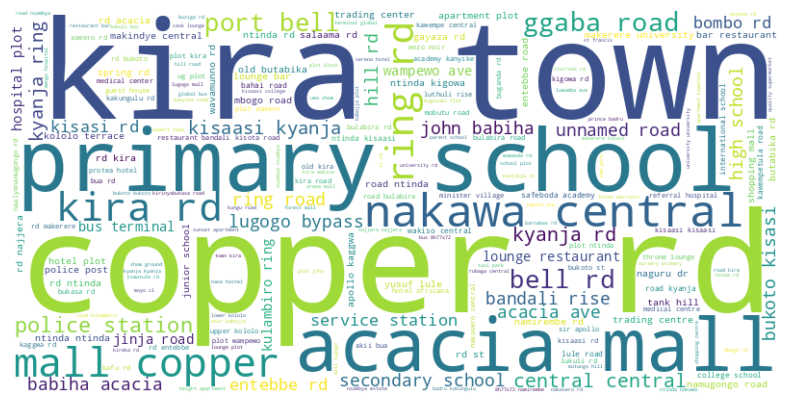

In [ ]:
# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()